In [1]:
import pandas as pd
import numpy as np

from pandas import Series
from scipy import stats
import statsmodels.api as sm   # regression

import matplotlib.pyplot as plt

C:\Users\Owner\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('SwapSpread.csv', parse_dates=['date2'])    # parse_date changes content in to TimeStamp

In [3]:
df.head()

,date2,swaprate,tbrate,swapspread
0,2000-07-03,7.24,6.00,1.24
1,2000-07-05,7.14,5.99,1.15
2,2000-07-06,7.21,6.05,1.16
3,2000-07-07,7.14,6.01,1.13
4,2000-07-10,7.20,6.04,1.16


In [4]:
df.describe()

,swaprate,tbrate,swapspread
count,4081.000000,4081.000000,4081.000000
mean,3.870789,3.533661,0.337128
std,1.446739,1.179197,0.302133
min,1.280000,1.370000,-0.230000
25%,2.550000,2.440000,0.090000
50%,4.070000,3.710000,0.340000
75%,5.020000,4.500000,0.540000
max,7.360000,6.170000,1.310000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4081 entries, 0 to 4080
Data columns (total 4 columns):
date2         4081 non-null datetime64[ns]
swaprate      4081 non-null float64
tbrate        4081 non-null float64
swapspread    4081 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 127.6 KB


In [6]:
df.index = df['date2']

In [7]:
df.set_index('date2', inplace= True)

In [8]:
df.index.rename('date', inplace = True)

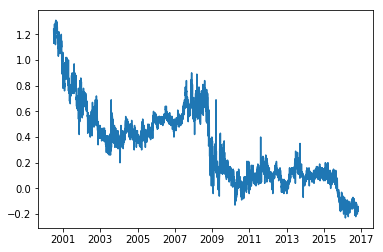

In [9]:
%matplotlib inline
plt.plot(df['swapspread'])

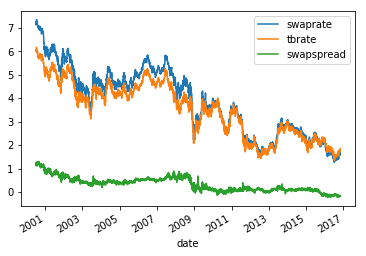

In [10]:
ax = df.plot()            # by default, index is x_axis

[Text(0,0,'-0.40%'),
 Text(0,0,'-0.20%'),
 Text(0,0,'0.00%'),
 Text(0,0,'0.20%'),
 Text(0,0,'0.40%'),
 Text(0,0,'0.60%'),
 Text(0,0,'0.80%'),
 Text(0,0,'1.00%'),
 Text(0,0,'1.20%'),
 Text(0,0,'1.40%')]

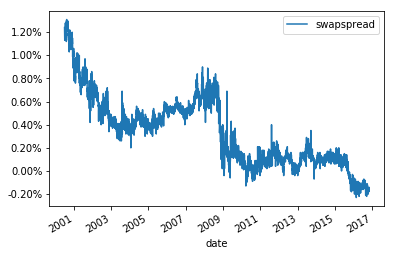

In [11]:
ax = df.plot(y= 'swapspread')
vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x) for x in vals])            # changing to percentage

C:\Users\Owner\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


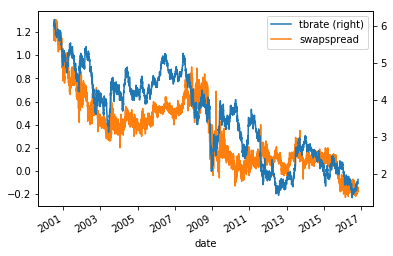

In [12]:
df.plot(y=['tbrate', 'swapspread'], secondary_y = 'tbrate')

C:\Users\Owner\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


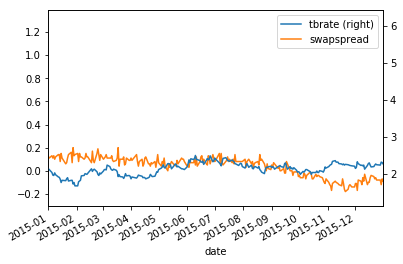

In [13]:
df.plot(y=['tbrate', 'swapspread'], secondary_y='tbrate', xlim=['2015-1-1','2015-12-31'])

C:\Users\Owner\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


(1.4, 2.6)

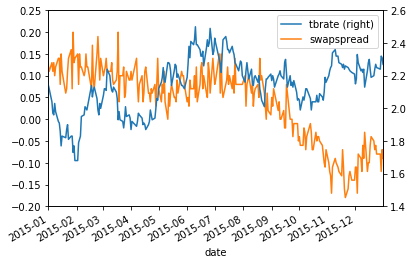

In [14]:
ax1= df.plot(y=['tbrate', 'swapspread'], secondary_y='tbrate', xlim=['2015-1-1','2015-12-31'], ylim=(-0.2,0.25))
ax1.right_ax.set_ylim(1.4,2.6)

In [15]:
mean = df[['tbrate','swapspread']].mean()
mean

tbrate        3.533661
swapspread    0.337128
dtype: float64

In [16]:
std = df[['tbrate','swapspread']].std()
std

tbrate        1.179197
swapspread    0.302133
dtype: float64

In [17]:
corr = df[['tbrate','swapspread']].corr()
corr

,tbrate,swapspread
tbrate,1.000000,0.857857
swapspread,0.857857,1.000000


In [18]:
df_2015 = df[['tbrate','swapspread']].loc['2015-01-1':'2015-12-31']

In [19]:
corr2 = df_2015.corr()
corr2

,tbrate,swapspread
tbrate,1.000000,-0.332385
swapspread,-0.332385,1.000000


In [22]:
df.tail()

,swaprate,tbrate,swapspread
date,,,
2016-10-24,1.61,1.77,-0.16
2016-10-25,1.59,1.77,-0.18
2016-10-26,1.64,1.79,-0.15
2016-10-27,1.71,1.85,-0.14
2016-10-28,1.71,1.86,-0.15


In [23]:
df.loc['2016-02-24']

swaprate      1.52
tbrate        1.75
swapspread   -0.23
Name: 2016-02-24 00:00:00, dtype: float64

In [29]:
swaprate = df['swaprate'].loc['2016-02-24']
tbrate = df['tbrate'].loc['2016-02-24']
swapspread = swaprate - tbrate

In [25]:
libor = 0.6346
repo = 0.595
FS = libor - repo
FS

0.03960000000000008

### SS = -0.23 and FS = 0.0396 so there is arbitrage opportunity. The investor should receive the float (LIBOR) and pay the fixed rate . Also buy T-bond by using repo financing.

In [27]:
net_profit = (libor - repo) - (1.52 - libor)
net_profit

-0.8457999999999999